In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


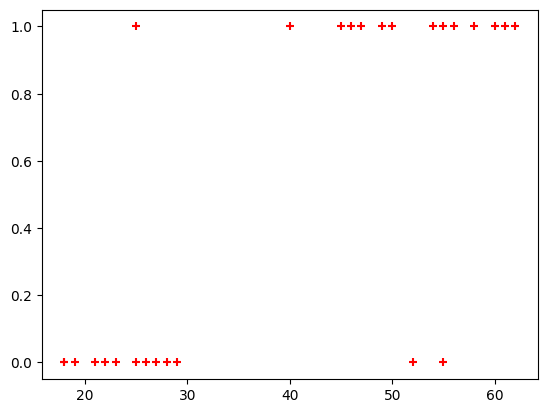

In [3]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [6]:
X_test

,age
10,18
15,55
19,18
14,49
6,55
22,40


In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [8]:
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
X_test

,age
10,18
15,55
19,18
14,49
6,55
22,40


In [10]:
y_predicted = model.predict(X_test)

In [11]:
model.predict_proba(X_test)

array([[0.95908148, 0.04091852],
       [0.06429721, 0.93570279],
       [0.95908148, 0.04091852],
       [0.15032893, 0.84967107],
       [0.06429721, 0.93570279],
       [0.42228837, 0.57771163]])

In [12]:

model.score(X_test,y_test)

0.8333333333333334

In [13]:
y_predicted

array([0, 1, 0, 1, 1, 1])

In [14]:
X_test

,age
10,18
15,55
19,18
14,49
6,55
22,40


model.coef_ indicates value of m in y=m*x + b equation

In [15]:
model.coef_

array([[0.15762635]])

model.intercept_ indicates value of b in y=m*x + b equation

In [16]:
model.intercept_

array([-5.99166757])

Lets defined sigmoid function now and do the math with hand

In [17]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [18]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

0.485 is less than 0.5 which means person with 35 age will not buy insurance

In [19]:
age = 35
prediction_function(age)

0.4850044983805899

0.485 is more than 0.5 which means person with 43 will buy the insurance

In [20]:
age = 43
prediction_function(age)

0.568565299077705

# Exercise

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [32]:
d = pd.read_csv("HR_comma_sep.csv")
d.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Data exploration and visualization**

In [33]:
left = d[d.left==1]
left.shape

(3571, 10)

In [34]:
retained = d[d.left==0]
retained.shape

(11428, 10)

Average numbers for all columns

In [35]:
print(d.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

In [40]:
d.groupby('left').mean(numeric_only=True)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Impact of salary on employee retention

<Axes: xlabel='salary'>

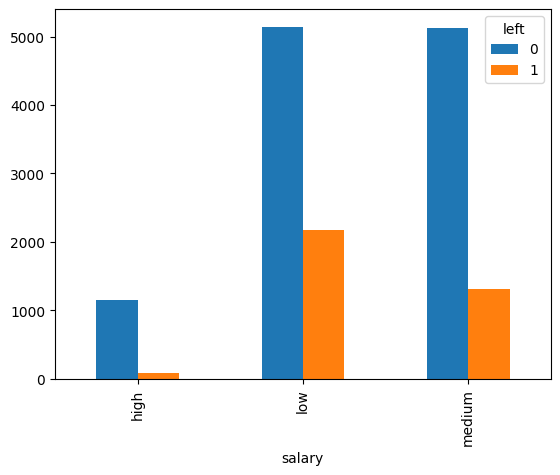

In [41]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

Department wise employee retention rate

<Axes: xlabel='Department'>

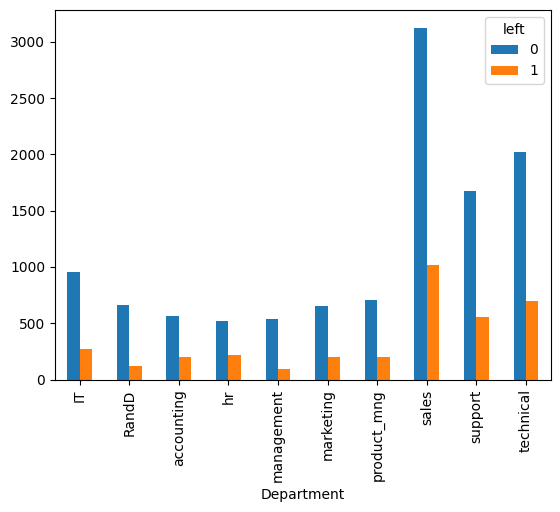

In [42]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

**From the data analysis so far we can conclude that we will use following variables as independant variables in our model**



1.   Satisfaction Level
2.   Average Monthly Hours
3.   Promotion Last 5 Years
4.   Salary




In [43]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


Tackle salary dummy variable

In [44]:

salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [45]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')


In [46]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [47]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [48]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [49]:
y = df.left

In [50]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [52]:
model.fit(X_train, y_train)

LogisticRegression()

In [53]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

**Accuracy of the model**

In [54]:
model.score(X_test,y_test)

0.7828571428571428

# Logistic Regression: Multiclass Classification

In [55]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

<Figure size 640x480 with 0 Axes>

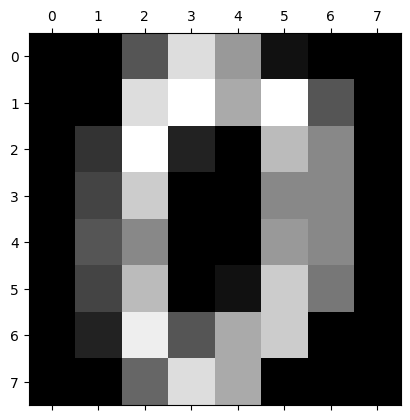

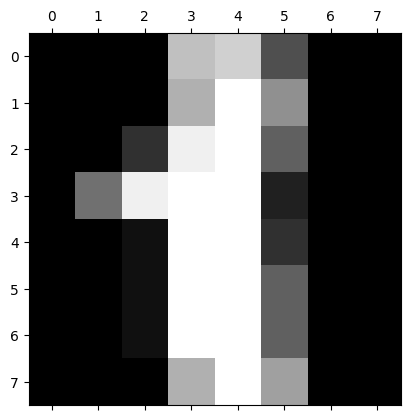

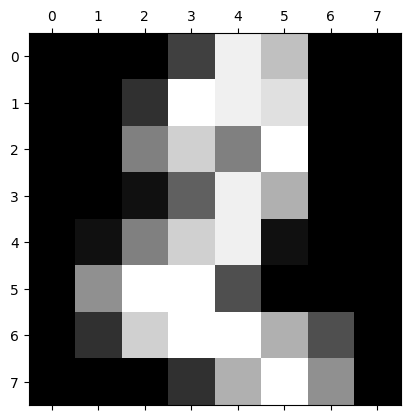

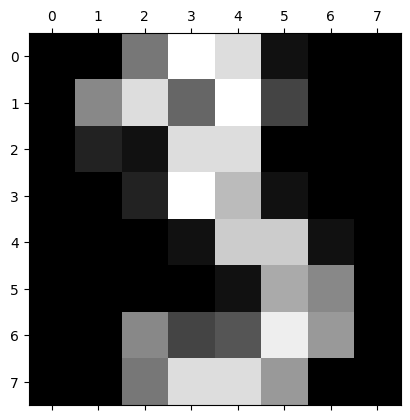

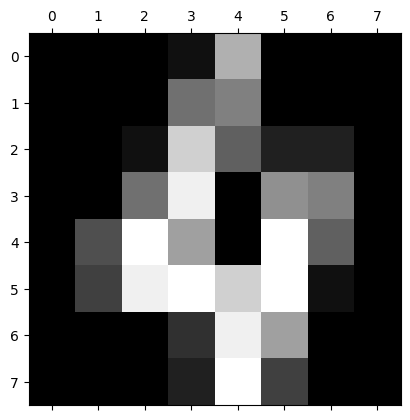

In [56]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [57]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [58]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

**Create and train logistic regression model**

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [60]:

from sklearn.model_selection import train_test_split

In [61]:

X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [62]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Measure accuracy of our model**

In [63]:
model.score(X_test, y_test)

0.9694444444444444

In [64]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

**Confusion Matrix**

In [65]:
y_predicted = model.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix
import numpy as np
cm = confusion_matrix(y_test, y_predicted)
cm = cm.astype(np.int64)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  1, 29,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  1,  0, 37,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 33]])

Text(95.72222222222221, 0.5, 'Truth')

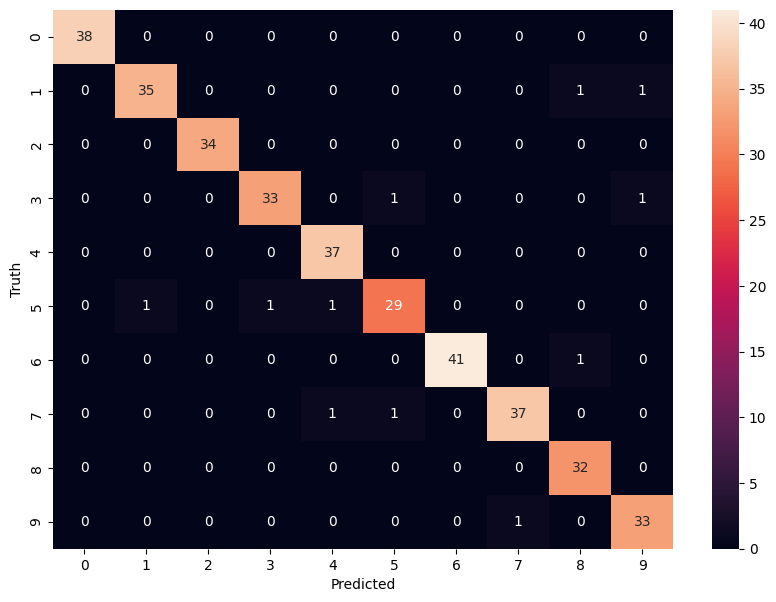

In [71]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
